In [2]:
import pandas as pd

DATA_PATH = 'C:/Users/bluecom015/Downloads/archive/'
train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')

train_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 제너레이터를 정의합니다.
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [5]:
# Make Generator
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='C:/Users/bluecom015/Downloads/archive/',
    x_col = 'image',
    y_col = train_df.columns[2:],
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='C:/Users/bluecom015/Downloads/archive/',
    x_col = 'image',
    y_col = val_df.columns[2:],
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [6]:
model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 10)

Epoch 1/10
175/175 [==============================] - 12s 67ms/step - loss: 0.6002 - acc: 0.3525 - val_loss: 0.3484 - val_acc: 0.4207
Epoch 2/10
175/175 [==============================] - 12s 68ms/step - loss: 0.3058 - acc: 0.4261 - val_loss: 0.2752 - val_acc: 0.5128
Epoch 3/10
175/175 [==============================] - 13s 75ms/step - loss: 0.2586 - acc: 0.4735 - val_loss: 0.3043 - val_acc: 0.4927
Epoch 4/10
175/175 [==============================] - 15s 85ms/step - loss: 0.2473 - acc: 0.4814 - val_loss: 0.2823 - val_acc: 0.5466
Epoch 5/10
175/175 [==============================] - 14s 80ms/step - loss: 0.2204 - acc: 0.5018 - val_loss: 0.2376 - val_acc: 0.4881
Epoch 6/10
175/175 [==============================] - 14s 82ms/step - loss: 0.1968 - acc: 0.5341 - val_loss: 0.2215 - val_acc: 0.4990
Epoch 7/10
175/175 [==============================] - 15s 87ms/step - loss: 0.1951 - acc: 0.5339 - val_loss: 0.2057 - val_acc: 0.5579
Epoch 8/10
175/175 [==============================] - 17s 95ms

In [9]:
# 5. 모델 평가하기
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='C:/Users/bluecom015/Downloads/archive/',
    x_col='image',
    y_col=test_df.columns[2:],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

loss_and_metrics = model.evaluate(test_generator,
                                  steps=get_steps(len(test_df), batch_size))
print('loss_and_metrics : ' + str(loss_and_metrics)) 

# loss_and_metrics : [0.18328142291474564, 0.9285179]

Found 3416 validated image filenames.
107/107 [==============================] - 5s 42ms/step - loss: 0.2007 - acc: 0.4628
loss_and_metrics : [0.20067456364631653, 0.4628220200538635]


In [12]:
preds = model.predict(test_generator)

107/107 [==============================] - 4s 34ms/step


In [14]:
preds[0]

array([6.8183577e-01, 1.5814298e-01, 1.3532534e-01, 3.8939644e-02,
       3.2377306e-02, 1.9493465e-04, 3.3440748e-03, 7.6253335e-03,
       8.7871540e-01, 1.8052969e-02, 2.8490955e-01], dtype=float32)

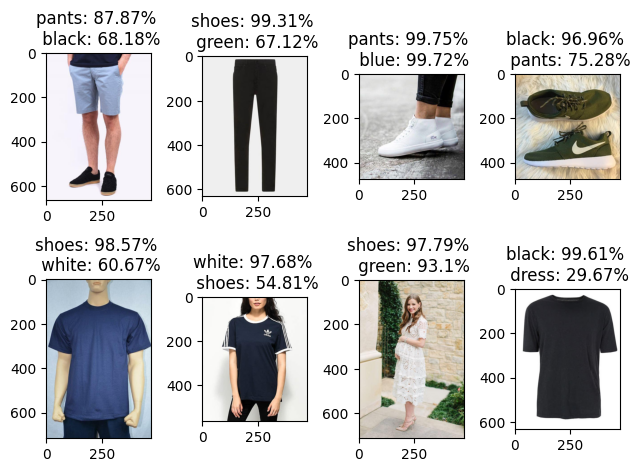

In [26]:
# 8개만 예측해보도록 하겠습니다.
import cv2
import matplotlib.pyplot as plt

do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(test_df.columns[2:], list(pred))
    # item --> prob
    # contributor: '뱅커'님
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]

    image = cv2.imread(DATA_PATH + test_df['image'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')

plt.tight_layout()